In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


#### Task 1: Data Cleaning and Preparation

In [5]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


Some columns have negative values, which may indicate erroneous data. For instance, the “Width” column has the minimum value of -174, which is nonsensical. Similarly, the “Tendency” and “NSP” columns also have negative values.

Replacing missing values with the median will not be influenced by outliers.

In [8]:
for col in ["LB", "AC", "DS", "DP", "MLTV", "Width", "Tendency"]:
    df.fillna({col: df[col].median()}, inplace=True)
    
df.fillna({"NSP": df["NSP"].mode()[0]}, inplace=True)

In [9]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

##### There are no missing values in the dataset but there are negative values.¶

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [11]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#### Detecting Outliers

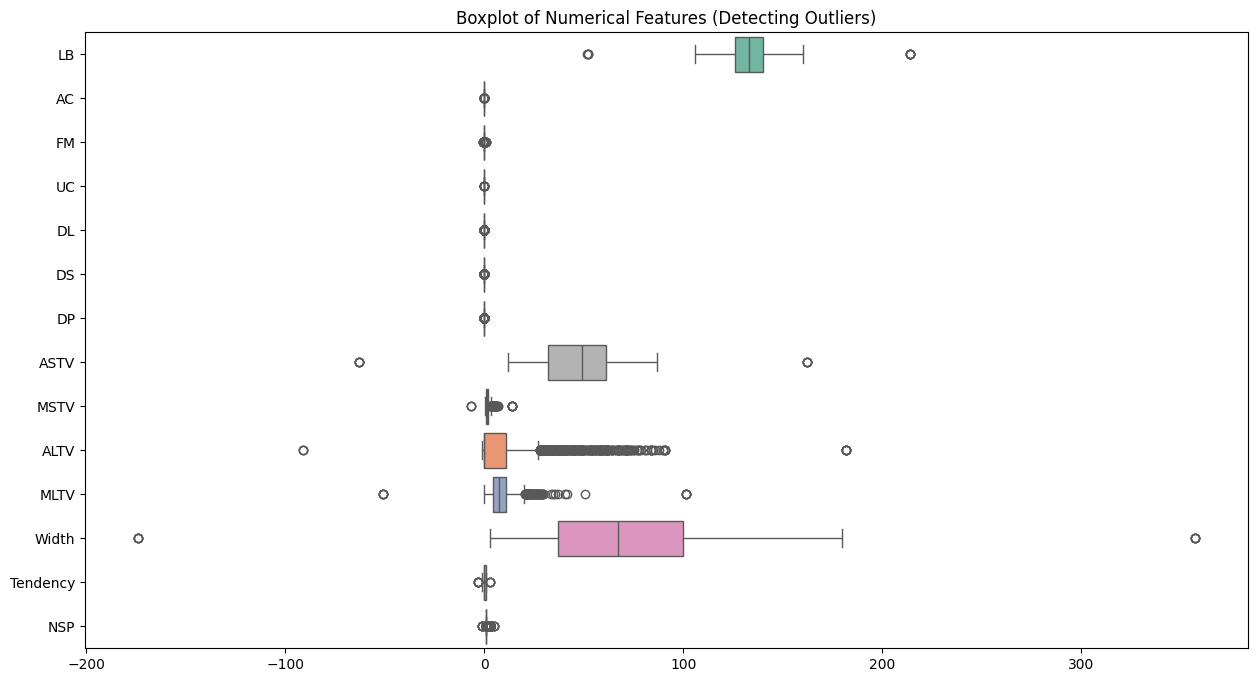

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()

##### MLTV, ASTV, ALTV, Width, and NSP show extreme outliers.

##### Removing Outliers

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [14]:
df_cleaned.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.0,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.0,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.0,1.0
37,114.000000,0.004559,0.0,0.004559,0.003040,0.0,0.0,24.0,3.2,0.0,16.2,134.0,0.0,1.0
50,133.000000,0.001634,0.0,0.008086,0.000000,0.0,0.0,29.0,1.3,0.0,7.4,67.0,0.0,1.0


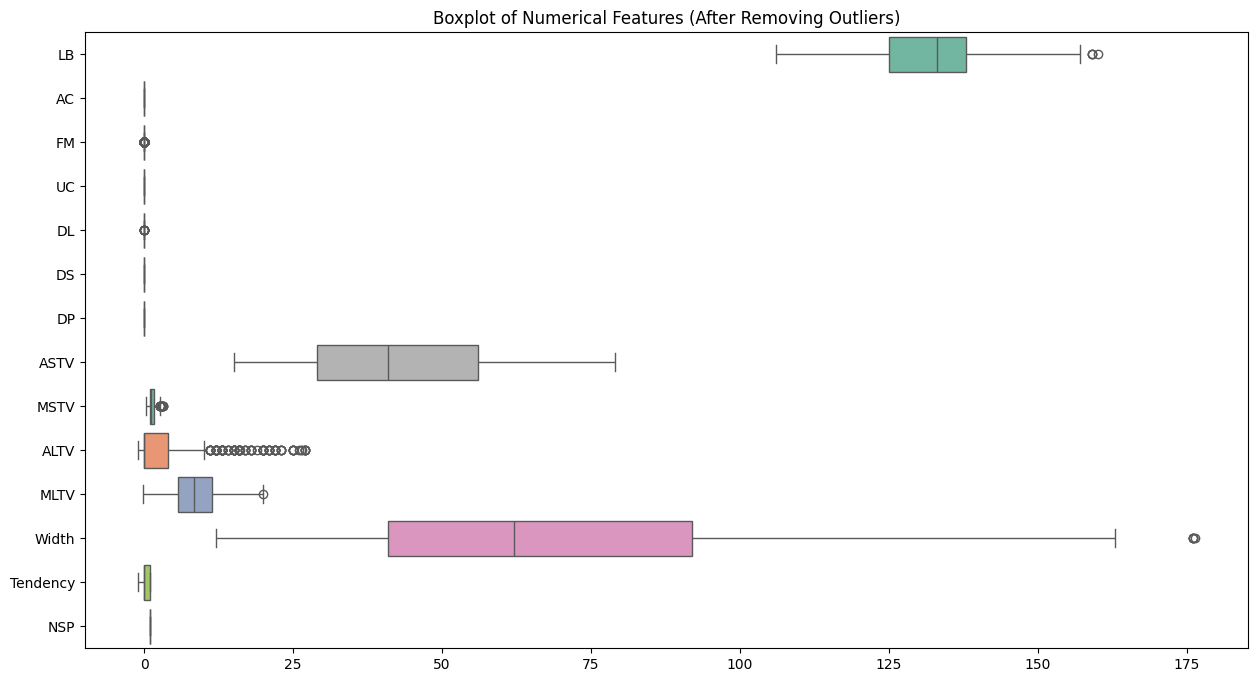

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned, orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features (After Removing Outliers)")
plt.show()

#### Task 2: Statistical Summary

In [17]:
df_cleaned.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.0,896.0,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.0
mean,131.859413,0.004036,0.000606,0.004961,0.001547,0.0,0.0,42.465669,1.273759,3.153095,8.596245,67.784187,0.333758,1.0
std,9.393070,0.003710,0.001346,0.002707,0.002214,0.0,0.0,15.055465,0.541923,6.032308,4.457159,32.370319,0.585941,0.0
min,106.000000,-0.000122,-0.002467,-0.000101,-0.000124,0.0,0.0,15.000000,0.300000,-1.043619,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000006,0.000000,0.003143,0.000000,0.0,0.0,29.000000,0.900000,0.000000,5.600000,41.000000,0.000000,1.0
50%,133.000000,0.003311,0.000000,0.005039,0.000000,0.0,0.0,41.000000,1.200000,0.000000,8.400000,62.000000,0.000000,1.0
75%,138.000000,0.006672,0.000323,0.006927,0.003083,0.0,0.0,56.000000,1.600000,4.000000,11.322598,92.000000,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008197,0.0,0.0,79.000000,3.200000,27.000000,20.000000,176.310998,1.023635,1.0


In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 1 to 2120
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        896 non-null    float64
 1   AC        896 non-null    float64
 2   FM        896 non-null    float64
 3   UC        896 non-null    float64
 4   DL        896 non-null    float64
 5   DS        896 non-null    float64
 6   DP        896 non-null    float64
 7   ASTV      896 non-null    float64
 8   MSTV      896 non-null    float64
 9   ALTV      896 non-null    float64
 10  MLTV      896 non-null    float64
 11  Width     896 non-null    float64
 12  Tendency  896 non-null    float64
 13  NSP       896 non-null    float64
dtypes: float64(14)
memory usage: 105.0 KB


#### Task 3: Data Visualization

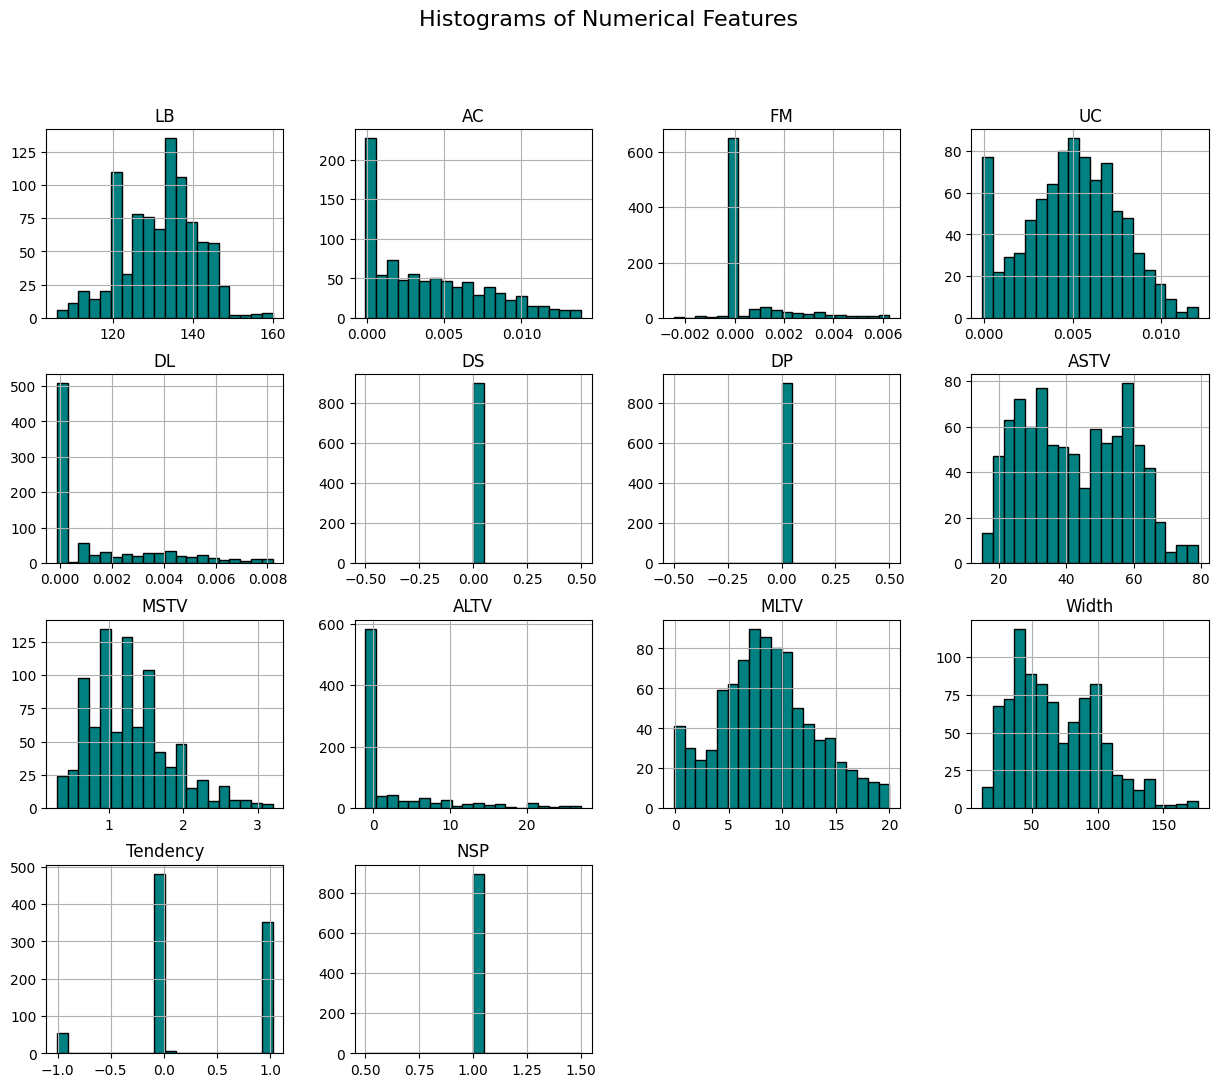

In [19]:
df_cleaned.hist(figsize=(15, 12), bins = 20, color = 'teal', edgecolor = 'black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

- Most features have right-skewed distributions, it means many values are concentrated on the lower end.

- LB (Baseline Fetal Heart Rate) appears to have a normal distribution.

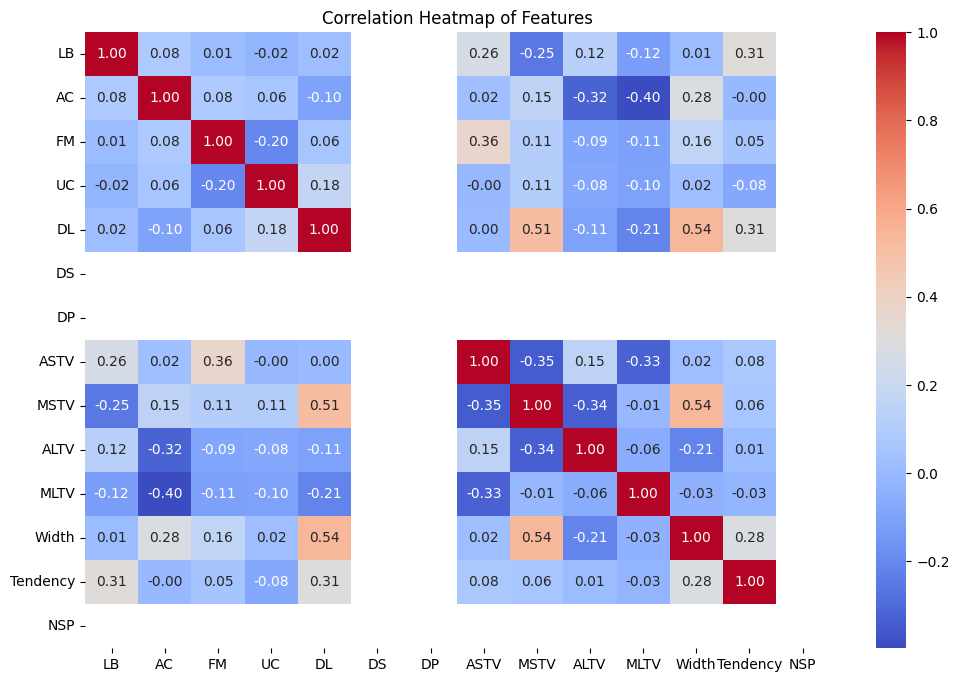

In [21]:
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

- MSTV (Mean Value for Short-Term Variability) and Width (0.54) have a moderate positive correlation. It means width increases, MSTV increases.

- ASTV (Percentage of Time with Abnormal Short Term Variability) and ALTV (Percentage of Time with Abnormal Long Term Variability) (0.15) have a weak positive correlation. They don't have a strong linear relationship.

- MSTV (Mean Value for Short-Term Variability) and MLTV (Mean Value for Long-Term Variability) (-0.01) have no correlation between them.

- MSTV and ASTV (-0.35): A moderate negative correlation, meaning as one increases, the other one decreases.

- NSP and other features: Almost all values are close to 0, suggesting NSP doesn't have a strong linear relationship with any features.

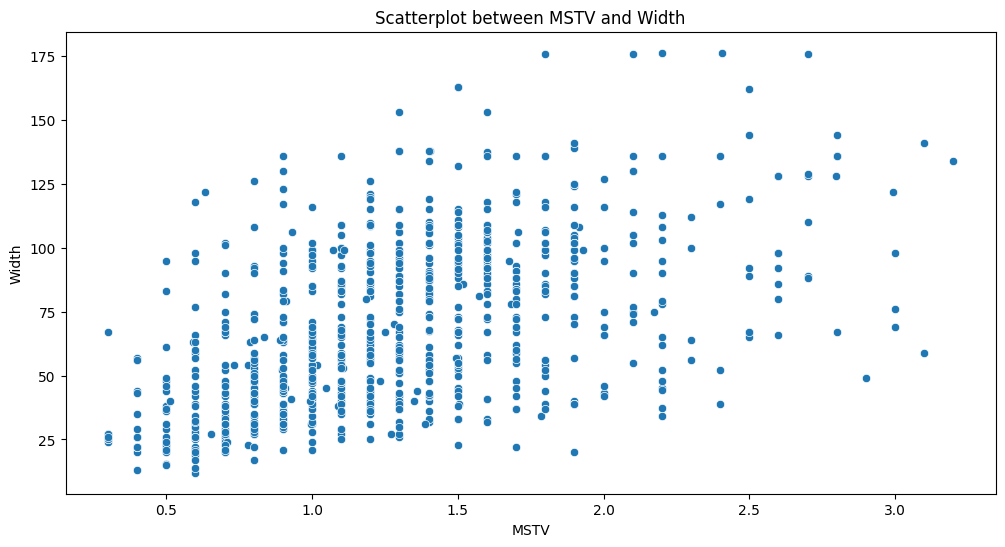

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_cleaned['MSTV'], y=df_cleaned['Width'])
plt.title("Scatterplot between MSTV and Width")
plt.show()

##### MSTV and Width have a positive correlation

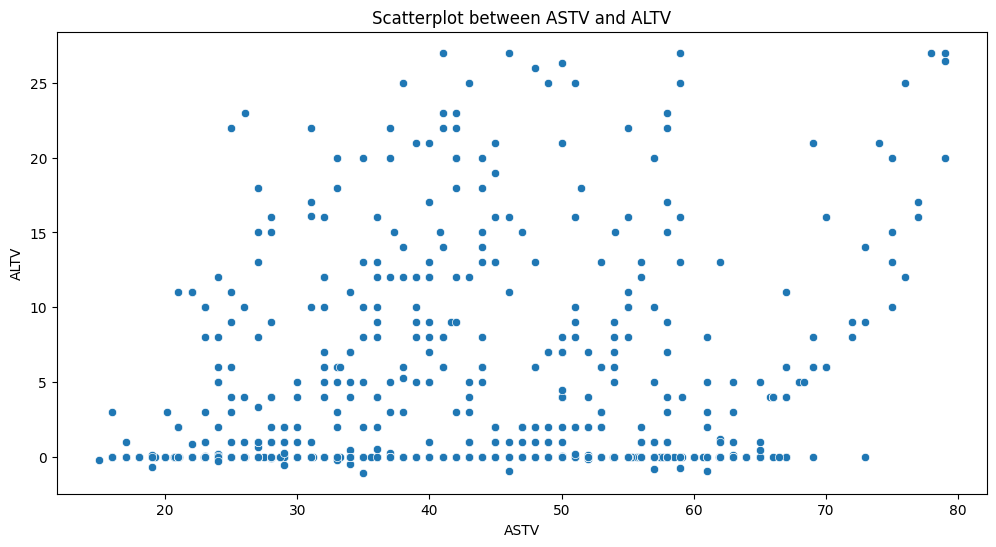

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_cleaned['ASTV'], y=df_cleaned['ALTV'])
plt.title("Scatterplot between ASTV and ALTV")
plt.show()

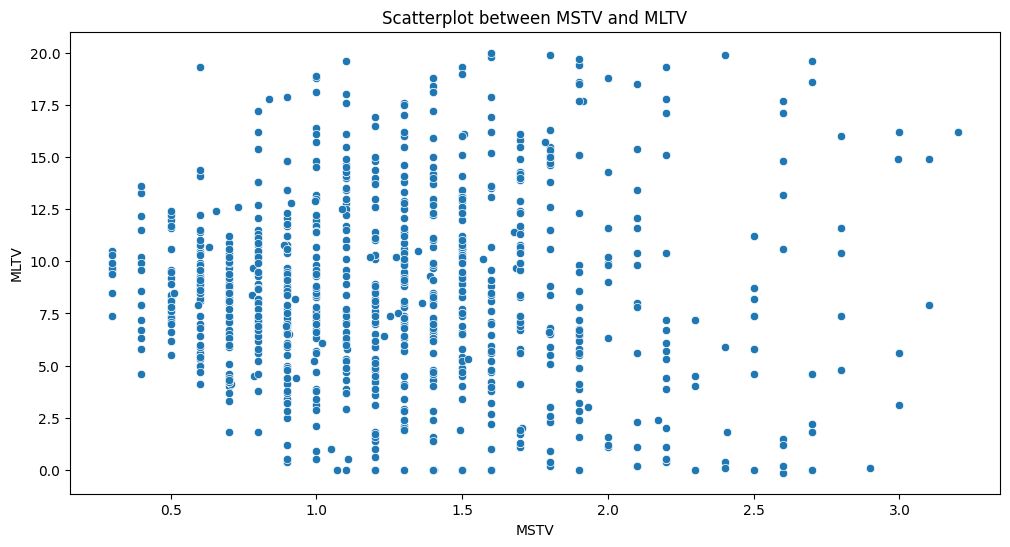

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_cleaned['MSTV'], y=df_cleaned['MLTV'])
plt.title("Scatterplot between MSTV and MLTV")
plt.show()

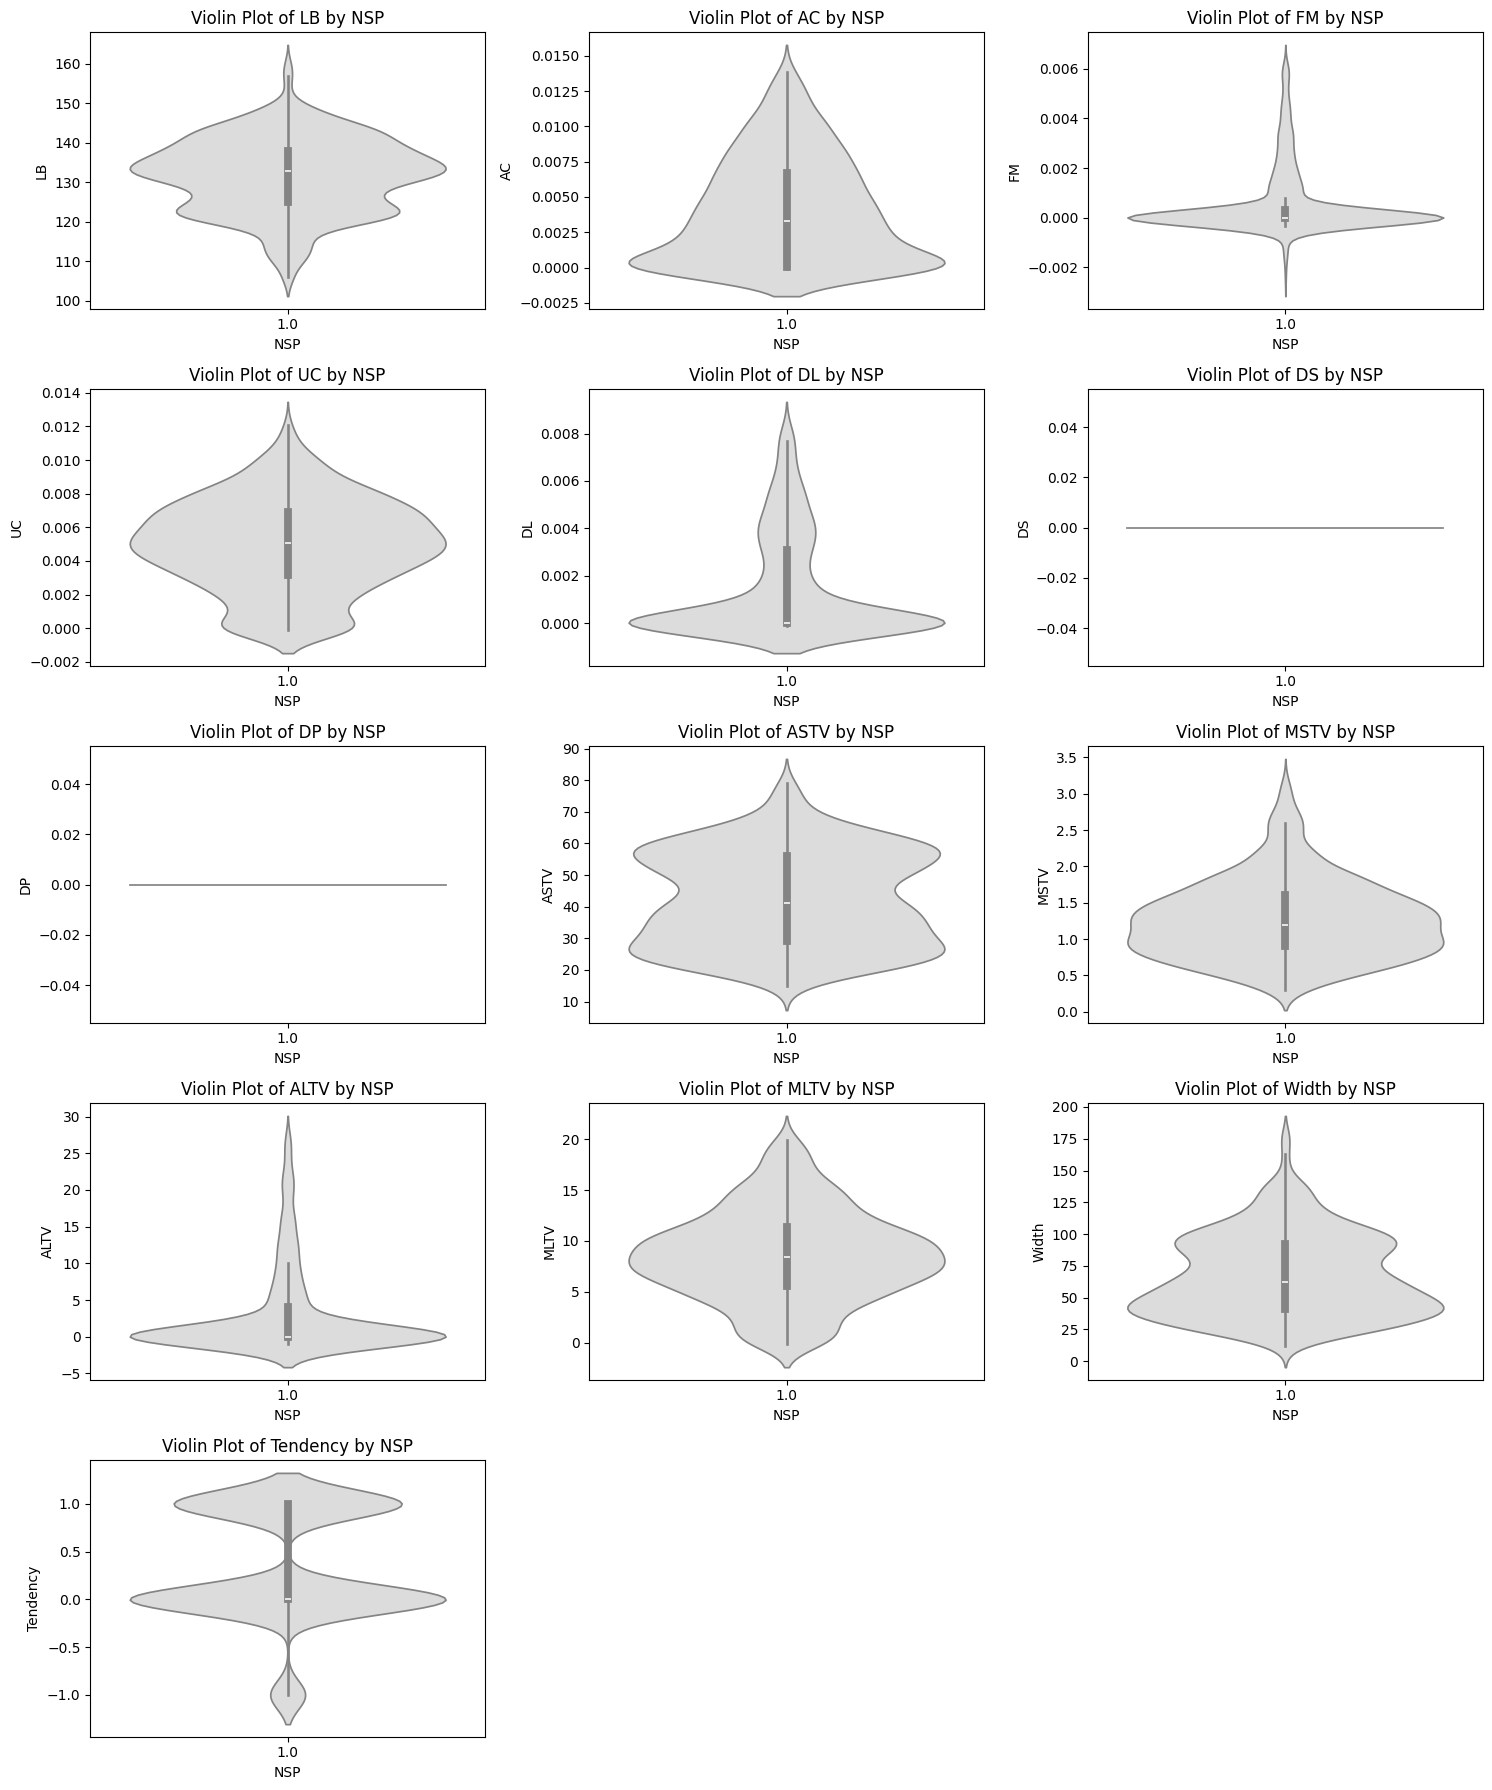

In [25]:
import warnings
warnings.filterwarnings("ignore")

categorical_column = 'NSP'  # Replace with the relevant categorical column if different
numerical_columns = df_cleaned.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 18))
for i, col in enumerate(numerical_columns[:13]):  # Limiting to first 6 numerical columns
    plt.subplot(5, 3, i + 1)
    sns.violinplot(x=df_cleaned[categorical_column], y=df_cleaned[col], palette="coolwarm")
    plt.title(f"Violin Plot of {col} by {categorical_column}")

plt.tight_layout()
plt.show()

- In almost all violin plots, the distribution of the data is symmetrical, indicating that the data is evenly distributed.

- In the violin plot of AC by NSP, the data exhibits a left-skewed distribution, with a thicker tail at the lower end. This pattern is also observed in the violin plots of FM by NSP, DL by NSP, ALTV by NSP.

### Conclusion

- The dataset had some missing values and outliers, which were handled through appropriate imputation technique.

- Features such as LB (Baseline Heart Rate), AC (Acceleration), and DS (Decelerations) showed moderate variation.

- ALTV, ASTV, MLTV, MSTV and Width contained extreme outliers, which were addressed by removing the outliers.

- Histograms and boxplots revealed skewness in some variables, indicating the need for normalization in further analysis.

- NSP (Fetal State) was highly imbalanced, with the majority of cases belonging to one category. This could affect predictive modeling and may require class balancing.

- Scatter plots and correlation heatmaps helped in identifying key relationships between ASTV and ALTV, MSTV and MLTV, MLTV and Width.